In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns

import missingno as msno #to visualize missing data

from imblearn.over_sampling import SMOTE
import itertools


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder #label encoding for categorical columns

In [4]:
pd.pandas.set_option('display.max_columns',None)

# Importing Data & EDA

In [5]:
data = pd.read_csv("application_record.csv", encoding = 'utf-8') 
record = pd.read_csv("credit_record.csv", encoding = 'utf-8')

In [6]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in dataset: {}".format(len(data.ID.unique())))
data.head()

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Unique clients and rows are not equal,which means there are duplicates.

In [7]:
print("Number of datapoints for credit records: {}".format(len(record)))
print("Number of unique clients in dataset: {}".format(len(record.ID.unique())))


Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


Checking to see how many records match in two datasets

In [8]:
len(set(record['ID']).intersection(set(data['ID'])))

36457

The number of unique ids in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 36,457 customers.

## Missing Values

Text(0.5, 1.0, 'Missing Data for application records dataset')

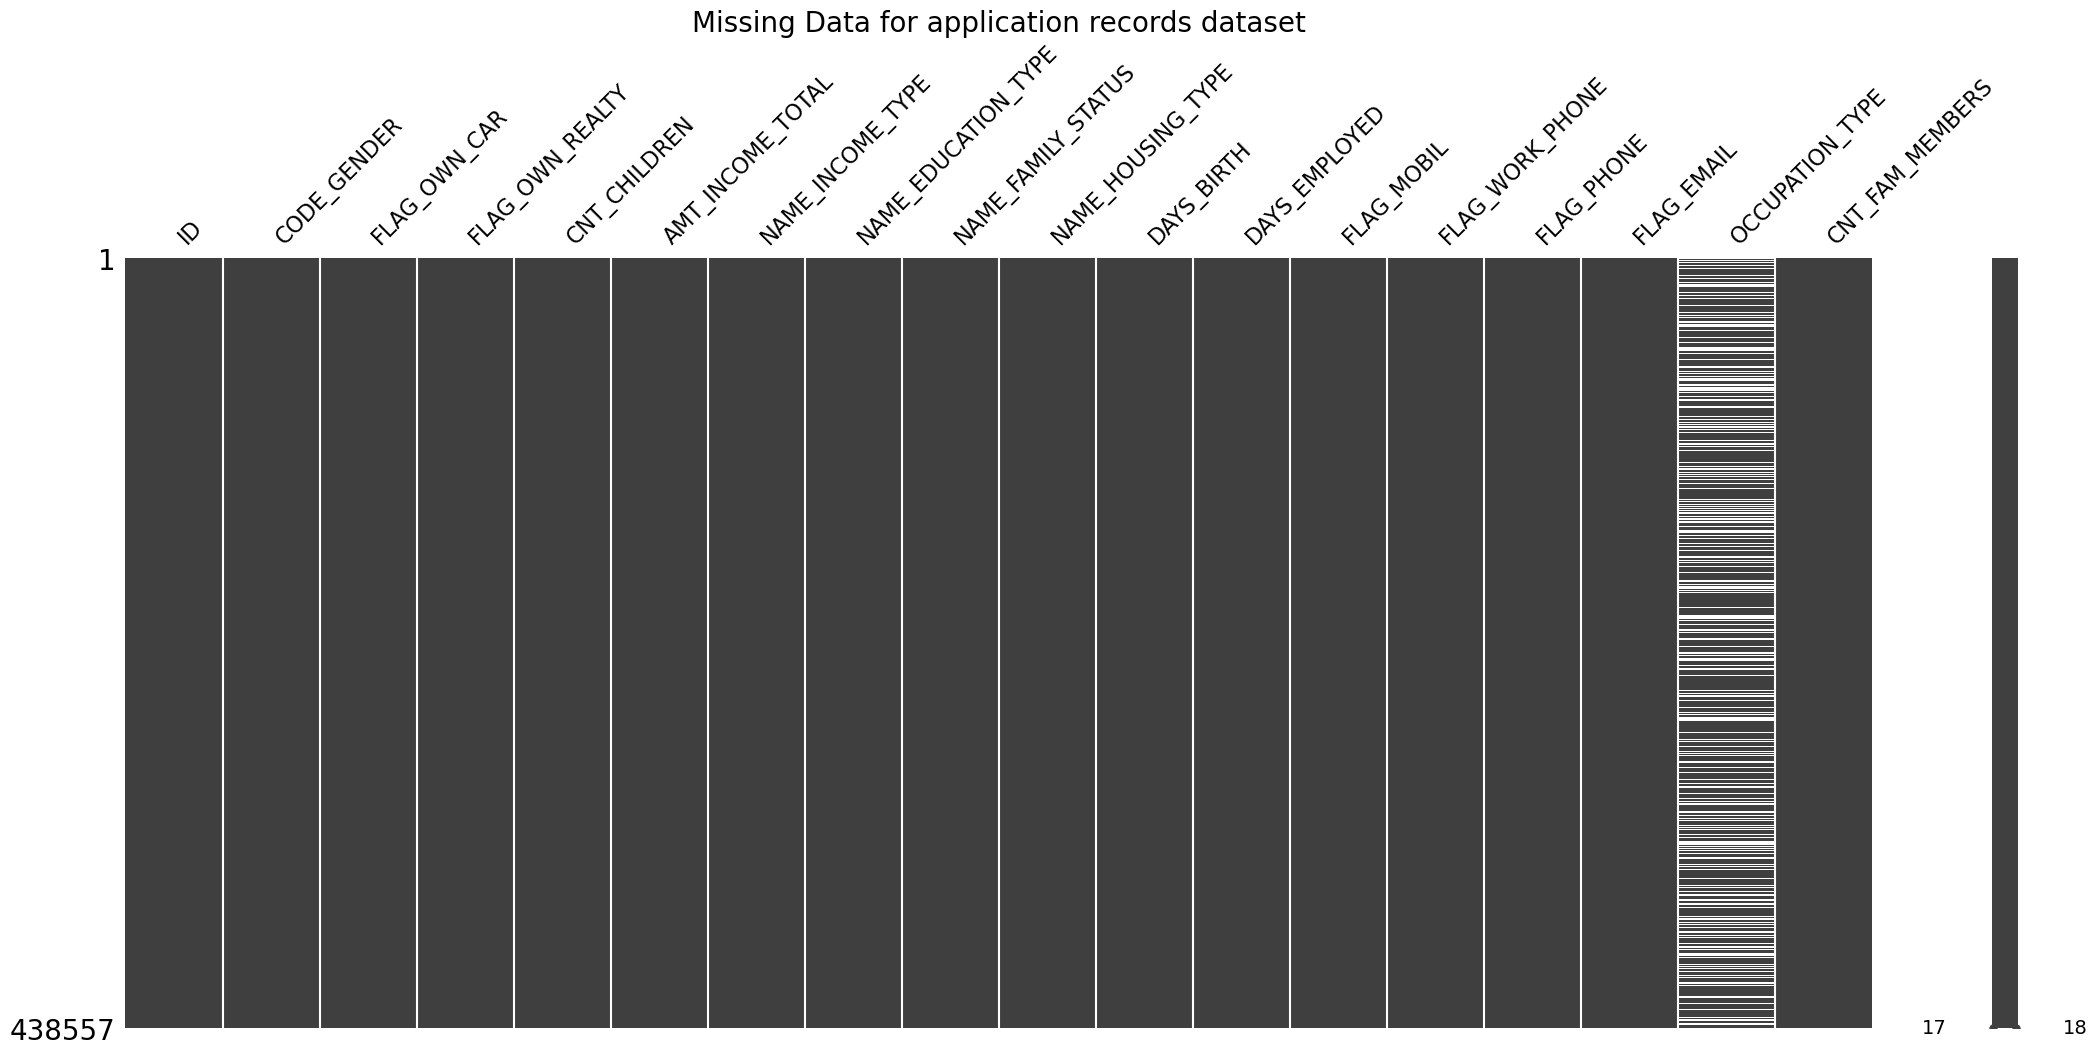

In [9]:
plt_missing_1 = msno.matrix(data)
plt_missing_1.set_title("Missing Data for application records dataset",fontsize=20)

Text(0.5, 1.0, 'Missing Data for credit records dataset')

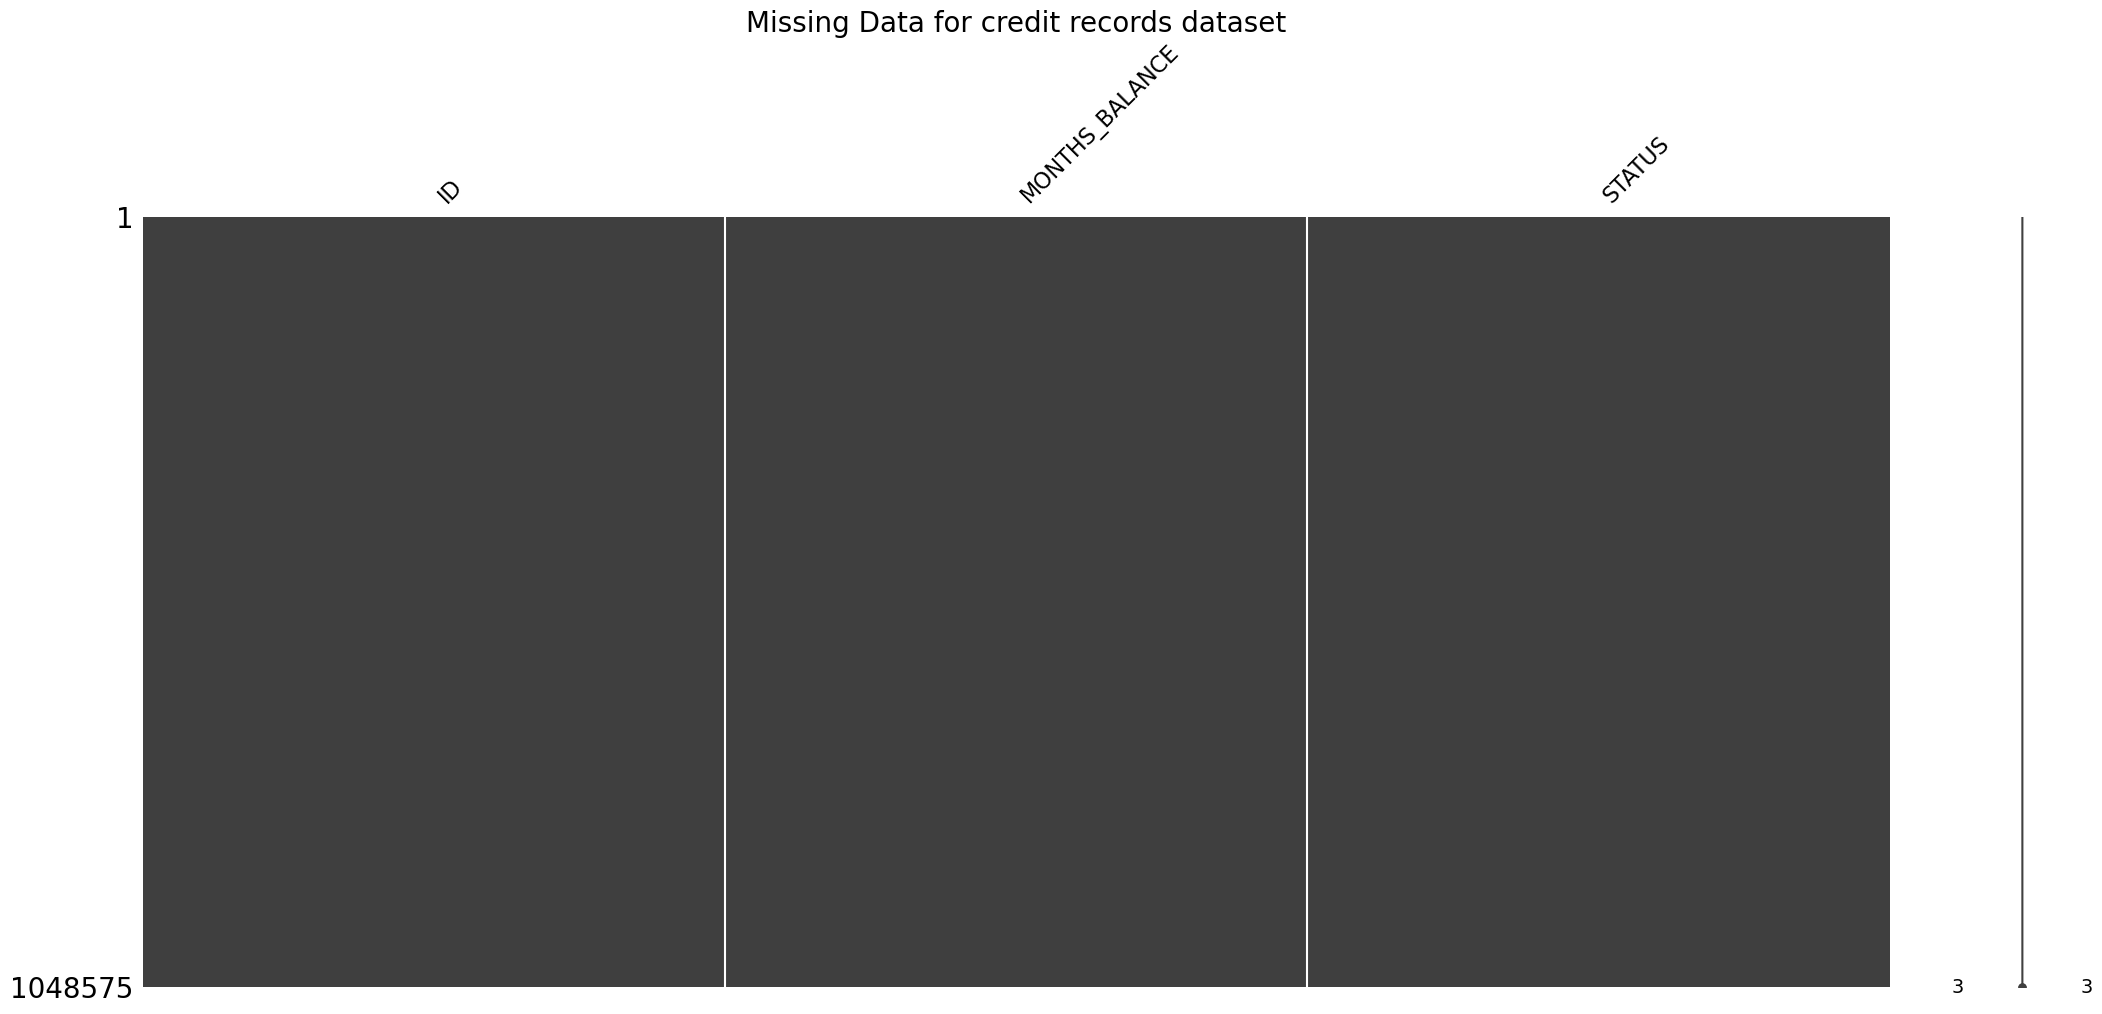

In [10]:
plt_missing_2 = msno.matrix(record)
plt_missing_2.set_title("Missing Data for credit records dataset",fontsize=20)

## Unique counts

In [11]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [12]:
unique_counts = pd.DataFrame.from_records([(col, record[col].nunique()) for col in record.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


# Data Visualization

In [13]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,                                       
    "figure.autolayout":True})
                
palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

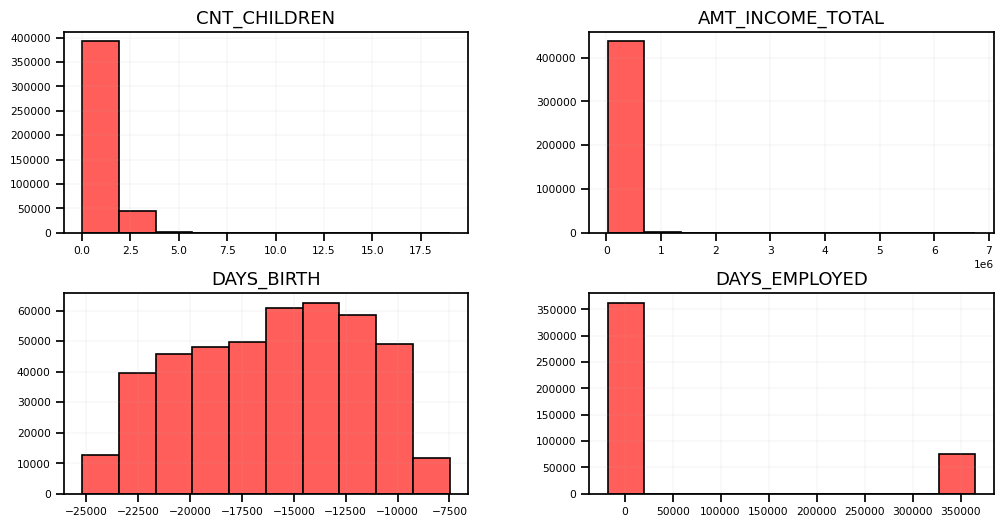

In [14]:
plt.figure(figsize=(10,10))

cols_to_plot = ["CNT_CHILDREN","AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]
data[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

There are outliers in 2 columns.
- CNT_CHILDREN
- AMT_INCOME_TOTAL

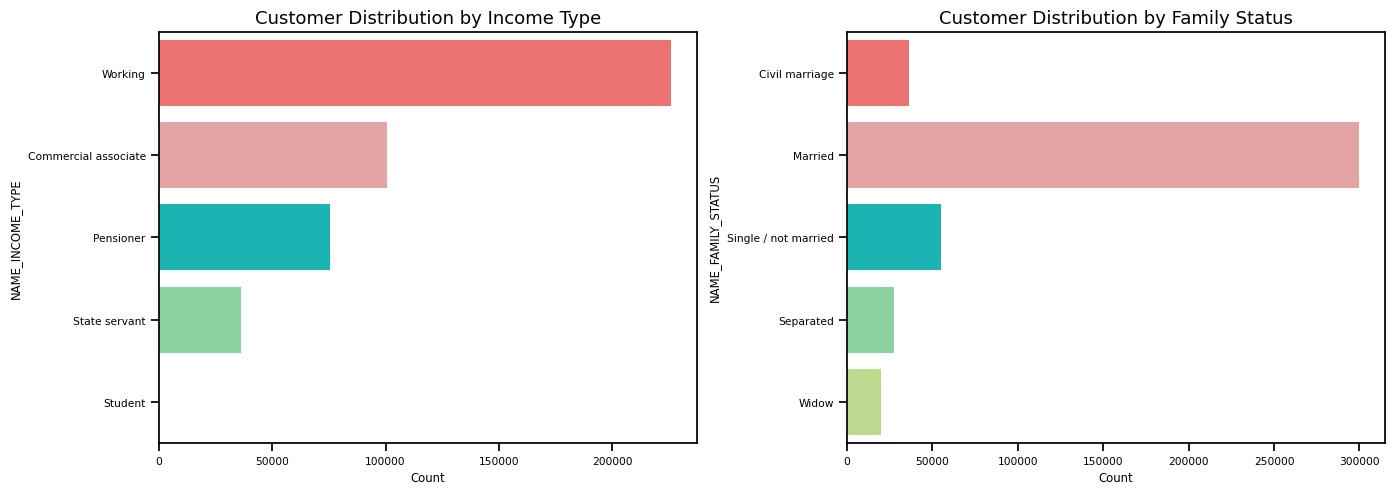

In [15]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=data.NAME_INCOME_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=data.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

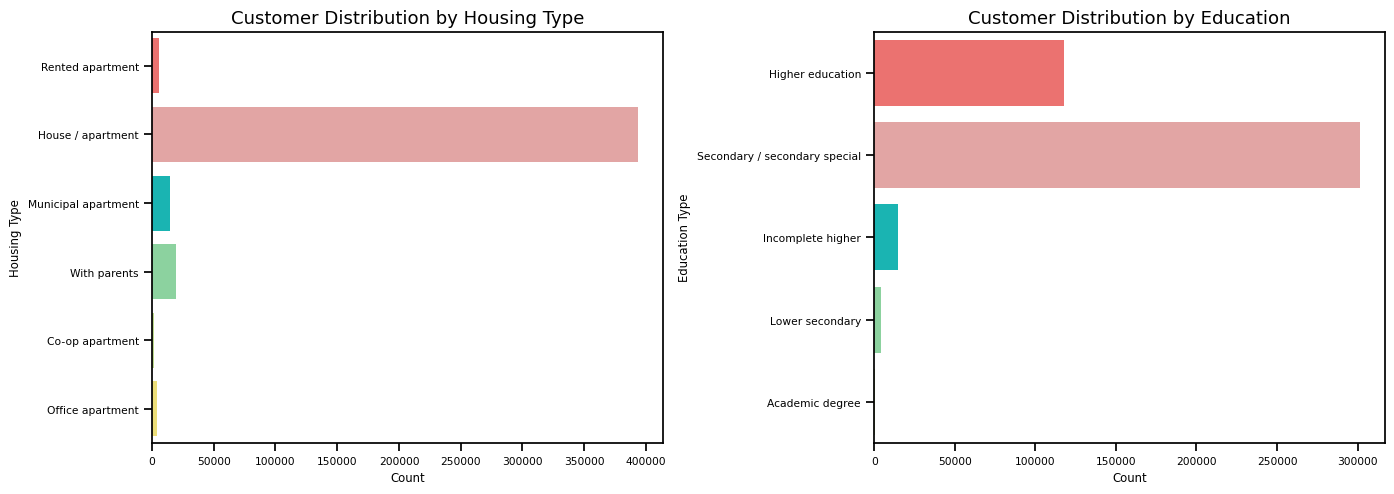

In [16]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=data.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=data.NAME_EDUCATION_TYPE, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

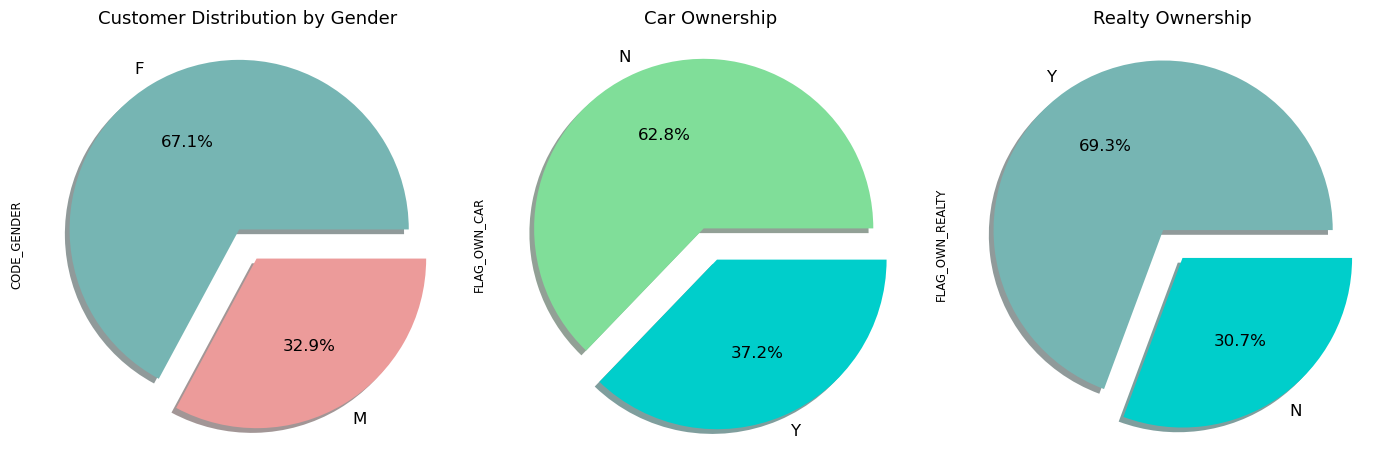

In [17]:
fig, axes = plt.subplots(1,3)

g1= data['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= data['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= data['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

# Data Preprocessing & Feature Engineering

Remove duplicate values and keep the last entry of the ID if its repeated.
The occupation type has missing values, we dropped them.

In [18]:
data = data.drop_duplicates('ID', keep='last') 
data.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [19]:
object_columns = data.columns[data.dtypes =='object'].tolist() #object columns in dataset

unique_counts = pd.DataFrame.from_records([(col, data[object_columns][col].nunique()) for col in data[object_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

unique_counts #unique counts for object columns 

,Column_Name,Num_Unique
0,CODE_GENDER,2
1,FLAG_OWN_CAR,2
2,FLAG_OWN_REALTY,2
3,NAME_INCOME_TYPE,5
4,NAME_EDUCATION_TYPE,5
5,NAME_FAMILY_STATUS,5
6,NAME_HOUSING_TYPE,6


We have filtered the columns that have non numeric values to see if they are useful. We will convert them numeric.

In [20]:
#renaming columns

data.rename(columns={"CODE_GENDER":"Gender","FLAG_OWN_CAR":"Own_Car","FLAG_OWN_REALTY":"Own_Realty",
                     "CNT_CHILDREN":"Children_Count","AMT_INCOME_TOTAL":"Income","NAME_EDUCATION_TYPE":"Education",
                     "NAME_FAMILY_STATUS":"Family_Status","NAME_HOUSING_TYPE":"Housing_Type","DAYS_BIRTH":"Birthday",
                     "DAYS_EMPLOYED":"Employment_Date","FLAG_MOBIL":"Own_Mobile","FLAG_WORK_PHONE":"Own_Work_Phone",
                     "FLAG_PHONE":"Own_Phone","FLAG_EMAIL":"Own_Email","CNT_FAM_MEMBERS":"Family_Member_Count",
                    "NAME_INCOME_TYPE":"Income_Type"},inplace=True)

In [21]:
#all users account open month
open_month=pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
open_month=open_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
customer_data=pd.merge(data,open_month,how="left",on="ID") #merge to record data

#convert categoric features into numeric

customer_data["Gender"] =  customer_data['Gender'].replace(['F','M'],[0,1])
customer_data["Own_Car"] = customer_data["Own_Car"].replace(["Y","N"],[1,0])
customer_data["Own_Realty"] = customer_data["Own_Realty"].replace(["Y","N"],[1,0])
customer_data["Is_Working"] = customer_data["Income_Type"].replace(["Working","Commercial associate","State servant","Pensioner","Student"],[1,1,1,0,0])

customer_data["In_Relationship"] = customer_data["Family_Status"].replace(["Civil marriage","Married","Single / not married",
                                                                          "Separated","Widow"],[1,1,0,0,0])

housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

customer_data["Housing_Type"] = customer_data['Housing_Type'].map(housing_type)

family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}

customer_data["Family_Status"] = customer_data["Family_Status"].map(family_status)

education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

customer_data["Education"] = customer_data["Education"].map(education_type)

income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}

customer_data["Income_Type"] = customer_data["Income_Type"].map(income_type)

customer_data["Household_Size"] = customer_data["Children_Count"] + customer_data["In_Relationship"].apply(lambda x: 2 if x==1 else 1)

customer_data["Age"] = round((customer_data.Birthday/365)*-1)

customer_data["Experience"] = customer_data.Employment_Date/365
customer_data['Experience']=customer_data['Experience'].apply(lambda v : int(v*-1) if v <0 else 0)

customer_data=customer_data.drop(columns=['Employment_Date','Birthday','Children_Count'])

customer_data= pd.get_dummies(customer_data, columns=['Income_Type', 'Education','Family_Status',"Housing_Type"])

In [22]:
customer_data.head()

,ID,Gender,Own_Car,Own_Realty,Income,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Member_Count,begin_month,Is_Working,In_Relationship,Household_Size,Age,Experience,Income_Type_Pensioner,Income_Type_Student,Income_Type_Working,Education_Academic degree,Education_Higher education,Education_secondary,Family_Status_Married,Family_Status_Single,Housing_Type_House / apartment,Housing_Type_With parents
0,5008804,1,1,1,427500.0,1,1,0,0,2.0,-15.0,1,1,2,33.0,12,0,0,1,0,1,0,1,0,1,0
1,5008805,1,1,1,427500.0,1,1,0,0,2.0,-14.0,1,1,2,33.0,12,0,0,1,0,1,0,1,0,1,0
2,5008806,1,1,1,112500.0,1,0,0,0,2.0,-29.0,1,1,2,59.0,3,0,0,1,0,0,1,1,0,1,0
3,5008808,0,0,1,270000.0,1,0,1,1,1.0,-4.0,1,0,1,52.0,8,0,0,1,0,0,1,0,1,1,0
4,5008809,0,0,1,270000.0,1,0,1,1,1.0,-26.0,1,0,1,52.0,8,0,0,1,0,0,1,0,1,1,0


We will look at numeric columns to see if there is anything that needs to be changed.

In [ ]:
other_numerical_cols = ["Income","Age","Experience","Household_Size"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Member Count"))

fig.add_trace(go.Box(x=customer_data.Income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=customer_data.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=customer_data.Experience, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=customer_data.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)

fig.show()

As seen above, there are some outliers values in children count, family member count, income and employment rate columns

- We need to remove these outliers to make sure they do not affect our model results.
- We will now remove these outliers by using z scores.

In [24]:
def calculate_z_scores(df, cols):
    for col in cols:
        df[col+"_z_score"] = (df[col] - df[col].mean())/df[col].std()
    return df

df_2 = calculate_z_scores(df = customer_data, cols = ["Income","Experience","Household_Size"])


#removing outliers
filter_2 = df_2.Household_Size_z_score.abs() <= 3.5
filter_3 = df_2.Experience_z_score.abs() <= 3.5
filter_4 = df_2.Income_z_score.abs() <= 3.5

customer_apps = df_2[filter_2 & filter_3 & filter_4]

customer_apps.drop(columns= ["Income_z_score","Experience_z_score","Household_Size_z_score"],inplace=True)

In [ ]:
other_numerical_cols = ["Income","Age","Experience","Family_Member_Count"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Member Count"))

fig.add_trace(go.Box(x=customer_apps.Income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=customer_apps.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=customer_apps.Experience, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=customer_apps.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)

fig.show()

In [26]:
record['dep_value'] = None
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes' 
record['dep_value'][record['STATUS'] =='4']='Yes' 
record['dep_value'][record['STATUS'] =='5']='Yes' 

record_count=record.groupby('ID').count()
record_count['dep_value'][record_count['dep_value'] > 0]='Yes' 
record_count['dep_value'][record_count['dep_value'] == 0]='No' 
record_count = record_count[['dep_value']]

In [27]:
# Data frame to analyze length of time since initial approval of credit card
# Shows number of past dues, paid off and no loan status.
grouped = record.groupby('ID')

pivot_tb = record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb['window'] += 1 # Adding 1 since month starts at 0.

#Counting number of past dues, paid offs and no loans.
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'C'].count(axis = 1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)
#Setting Id column to merge with app data.
pivot_tb['ID'] = pivot_tb.index

In [28]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,open_month,end_month,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X,-3,0,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,C,C,C,C,C,C,C,C,C,-18,0,19,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,-21,0,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,-14,0,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,-59,0,60,0,0,0,0,0,0,0,60,5001715


In [29]:
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values+ pivot_tb['pastdue_30-59'].values + pivot_tb['pastdue_60-89'].values +pivot_tb['pastdue_90-119'].values+pivot_tb['pastdue_120-149'].values +pivot_tb['pastdue_over_150'].values
target['no_loan'] = pivot_tb['no_loan'].values
customer_apps_1 = customer_apps.merge(target, how = 'inner', on = 'ID')

customer_apps_2=pd.merge(customer_apps_1,record_count,how='inner',on='ID')
customer_apps_2['target']=customer_apps_2['dep_value']
customer_apps_2.loc[customer_apps_2['target']=='Yes','target']=1
customer_apps_2.loc[customer_apps_2['target']=='No','target']=0

customer_apps_2.drop(columns=["dep_value"],inplace=True)

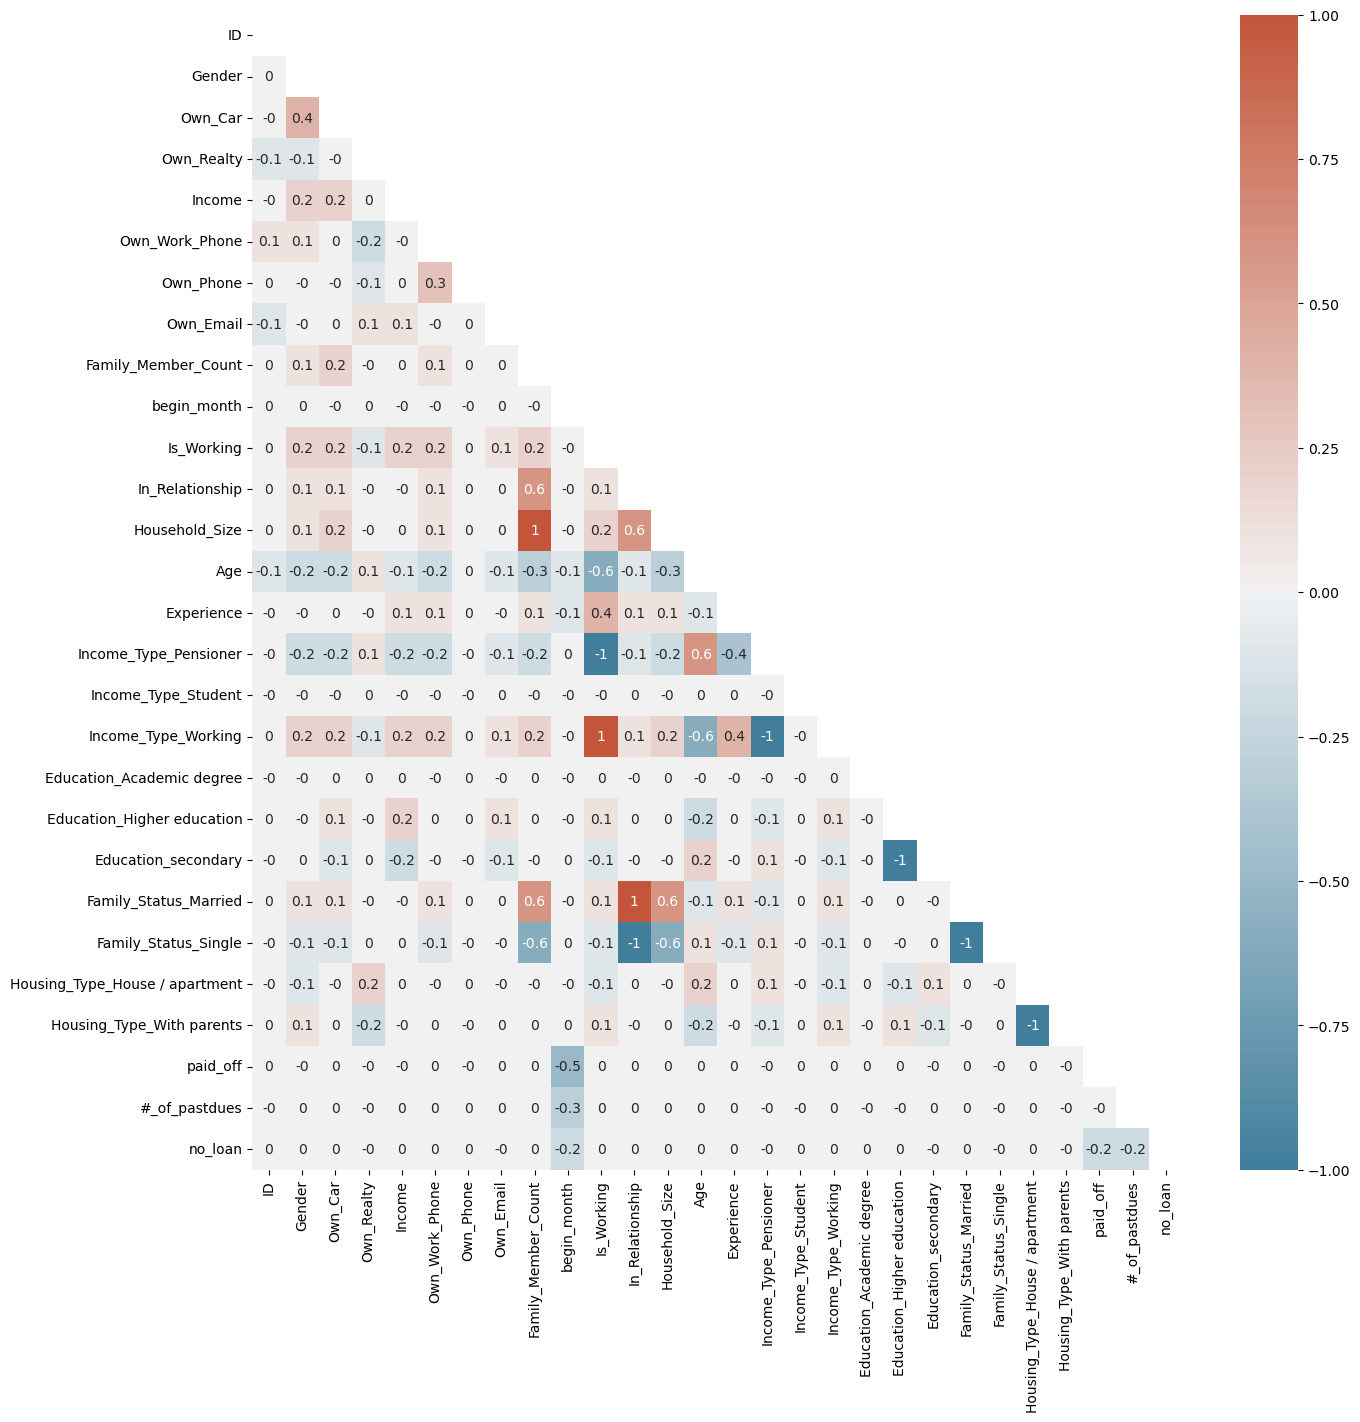

In [30]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = customer_apps_2.drop(columns=["Own_Mobile"]).corr().round(1)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.show()

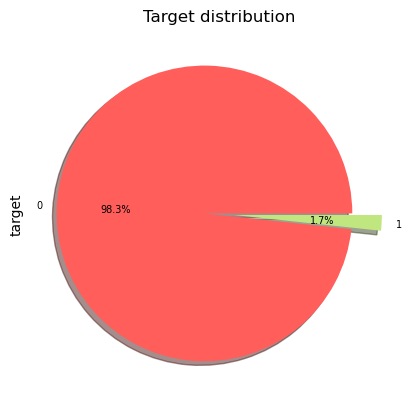

In [31]:
customer_apps_2['target'].value_counts().plot.pie(explode=[0.1,0.1],
                                                  autopct='%1.1f%%',shadow=True, colors=['#FF5E5B', '#C0E680'],
                                                  textprops = {'fontsize':7}).set_title("Target distribution")

plt.show()

In [32]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,                                       
    'figure.figsize':(15,15)})
                
palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

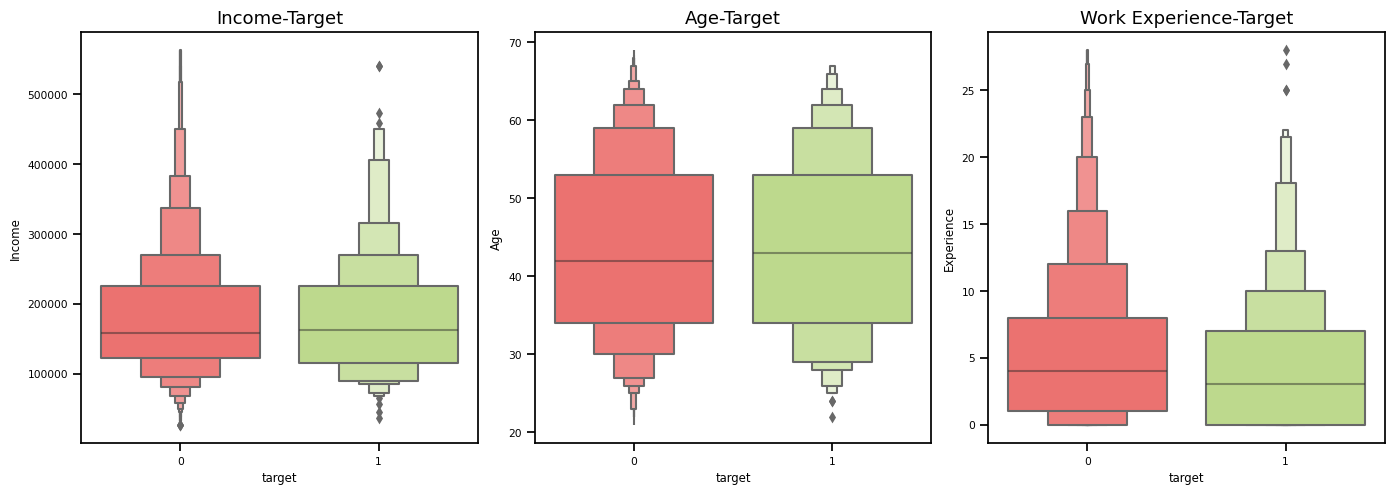

In [33]:
fig, axes = plt.subplots(1,3)

g1=sns.boxenplot(x='target', y='Income', data=customer_apps_2,palette=['#FF5E5B', '#C0E680'], ax=axes[0])
g1.set_title("Income-Target")
g2=sns.boxenplot(x='target', y='Age', data=customer_apps_2,palette=['#FF5E5B', '#C0E680'], ax=axes[1])
g2.set_title("Age-Target")
g3=sns.boxenplot(x='target', y='Experience', data=customer_apps_2,palette=['#FF5E5B', '#C0E680'], ax=axes[2])
g3.set_title("Work Experience-Target")

fig.set_size_inches(14,5)

plt.tight_layout()
plt.show()

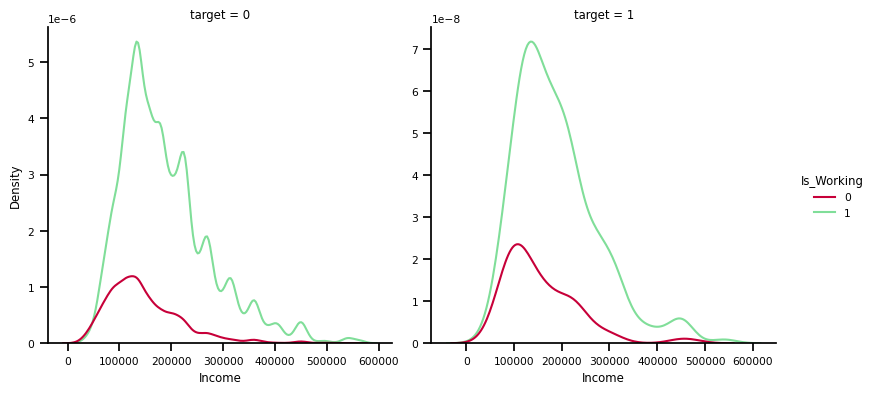

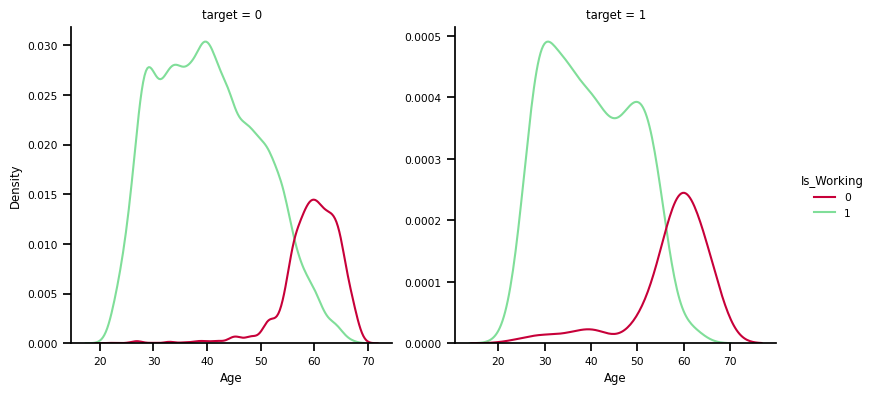

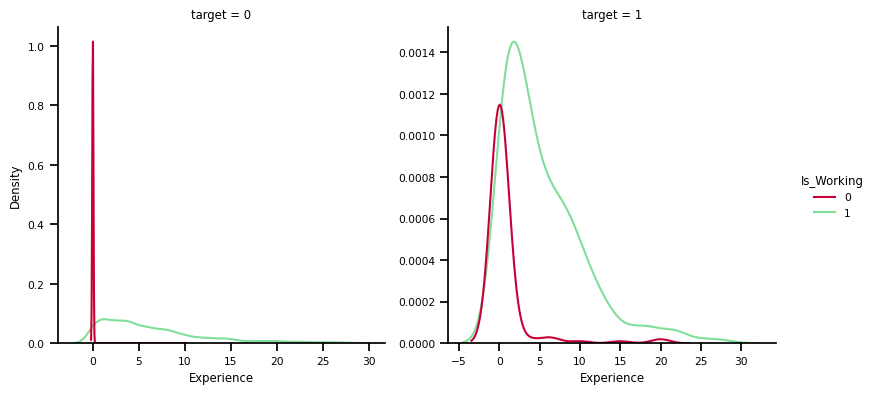

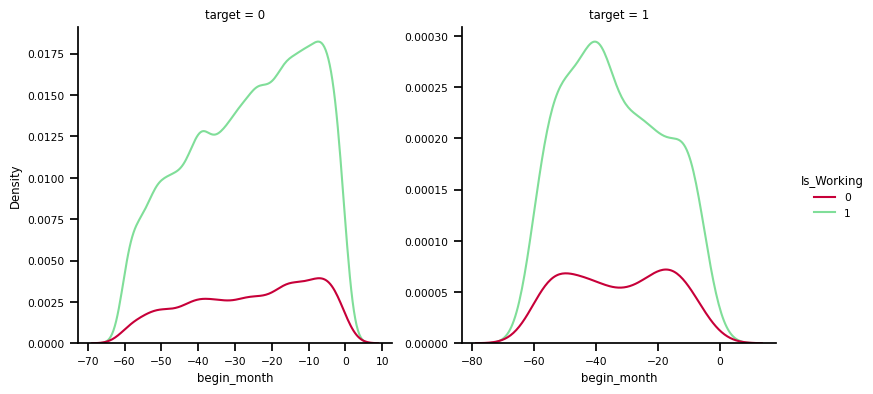

In [34]:
sns.displot(data=customer_apps_2, x='Income', hue="Is_Working", col='target', kind="kde", height=4,
            facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])

sns.displot(data=customer_apps_2, x='Age', hue="Is_Working", col='target', kind="kde", height=4,
            facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])

sns.displot(data=customer_apps_2, x='Experience', hue="Is_Working", col='target', kind="kde", height=4,
            facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])

sns.displot(data=customer_apps_2, x='begin_month', hue="Is_Working", col='target', kind="kde", height=4,
            facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])
plt.show()

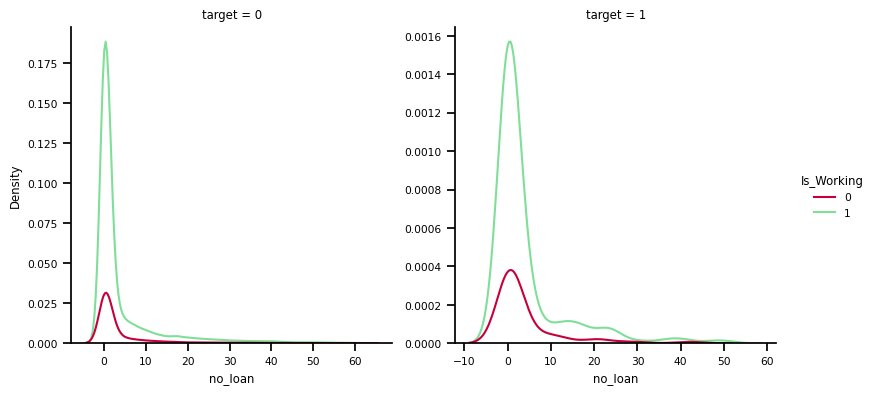

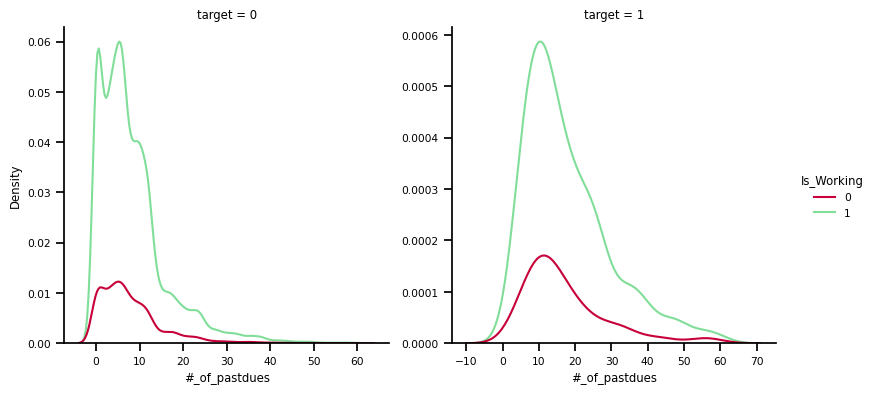

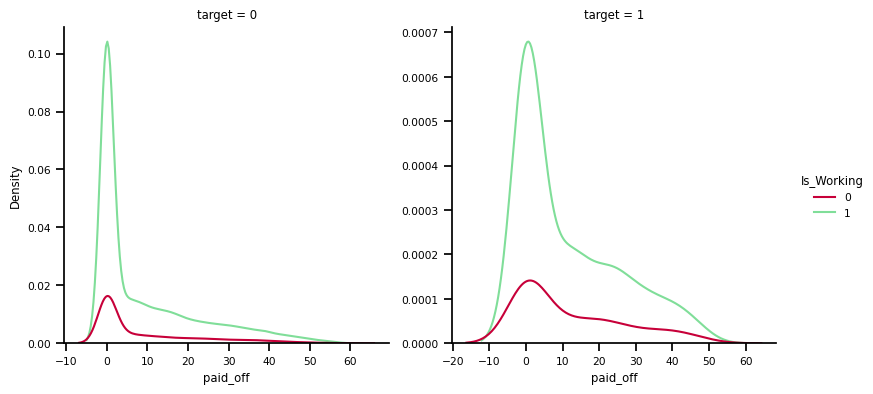

In [35]:
sns.displot(data=customer_apps_2, x='no_loan', hue="Is_Working", col='target', kind="kde", height=4,
            facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])

sns.displot(data=customer_apps_2, x='#_of_pastdues', hue="Is_Working", col='target', kind="kde", height=4,
            facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])

sns.displot(data=customer_apps_2, x='paid_off', hue="Is_Working", col='target', kind="kde", height=4,
            facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])
plt.show()

In [36]:
customer_apps_2.head()

,ID,Gender,Own_Car,Own_Realty,Income,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Member_Count,begin_month,Is_Working,In_Relationship,Household_Size,Age,Experience,Income_Type_Pensioner,Income_Type_Student,Income_Type_Working,Education_Academic degree,Education_Higher education,Education_secondary,Family_Status_Married,Family_Status_Single,Housing_Type_House / apartment,Housing_Type_With parents,paid_off,#_of_pastdues,no_loan,target
0,5008804,1,1,1,427500.0,1,1,0,0,2.0,-15.0,1,1,2,33.0,12,0,0,1,0,1,0,1,0,1,0,13,2,1,0
1,5008805,1,1,1,427500.0,1,1,0,0,2.0,-14.0,1,1,2,33.0,12,0,0,1,0,1,0,1,0,1,0,12,2,1,0
2,5008806,1,1,1,112500.0,1,0,0,0,2.0,-29.0,1,1,2,59.0,3,0,0,1,0,0,1,1,0,1,0,7,7,16,0
3,5008808,0,0,1,270000.0,1,0,1,1,1.0,-4.0,1,0,1,52.0,8,0,0,1,0,0,1,0,1,1,0,0,2,3,0
4,5008809,0,0,1,270000.0,1,0,1,1,1.0,-26.0,1,0,1,52.0,8,0,0,1,0,0,1,0,1,1,0,0,0,5,0


# Feature Selection

In [37]:
X = customer_apps_2.iloc[:,1:-1]
y = customer_apps_2[["target"]]

In [38]:
#splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)
print(X_train.shape)

(28520, 28)


We use Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.

It's crucial that SMOTE technique was applied only train dataset.

In [39]:
y_train = y_train.astype('int')
X_balance,Y_balance = SMOTE().fit_resample(X_train,y_train)
X_balance = pd.DataFrame(X_balance, columns = X_train.columns)
Y_balance = pd.DataFrame(Y_balance, columns=["target"])

In [40]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    
    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

In [41]:
iv_df = X_balance.copy()
iv_df["target"] = y_train

features = iv_df.columns[:-1].tolist()

iv_list = []
for feature in features:
    iv, data = calc_iv(iv_df, feature, 'target')
    iv_list.append(round(iv,4))

woe_df = pd.DataFrame(np.column_stack([features, iv_list]), 
                      columns=['Feature', 'iv'])
woe_df

,Feature,iv
0,Gender,0.0022
1,Own_Car,0.0053
2,Own_Realty,0.0071
3,Income,0.1449
4,Own_Mobile,0.0
5,Own_Work_Phone,0.0045
6,Own_Phone,0.0153
7,Own_Email,0.001
8,Family_Member_Count,0.026
9,begin_month,0.1811


## Feature Scaling

In [42]:

scaler = StandardScaler()
scaler.fit(X_balance)

X_train = pd.DataFrame(scaler.transform(X_balance), columns=[X_balance.columns])

### ExtraTreesClassifier

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_balance, Y_balance)
feature_importances = pd.DataFrame({"Feature":features,
              "Feature_Importance_ExtratreeClassifier":model.feature_importances_})

Now we will merge all importance scores from different feature selection methods

# Modelling

In [44]:
selected_features = ["begin_month","Income","Experience","In_Relationship",
                     "Education_Higher education","Education_secondary","Own_Realty",
                     "Family_Status_Single","Family_Member_Count","Is_Working",
                     "Own_Car","Age"]

In [45]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16),
    "XGBoost" : XGBClassifier(max_depth=12,
                              n_estimators=250,
                              min_child_weight=8, 
                              subsample=0.8, 
                              learning_rate =0.02,    
                              seed=42),
        "CatBoost" : CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)
}

result_table = pd.DataFrame(columns=['classifiers','accuracy','presicion','recall','f1_score','fpr','tpr','auc'])

y_test = y_test.astype(int)


for key, classifier in classifiers.items():
    classifier.fit(X_balance[selected_features], Y_balance)
    
    
    y_predict = classifier.predict(X_test[selected_features])
    
    yproba = classifier.predict_proba(X_test[selected_features])[::,1]
    
    
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    conf_matrix = confusion_matrix(y_test,y_predict)
    
    result_table = result_table.append({'classifiers':key,
                                        'accuracy':accuracy_score(y_test, y_predict),
                                        'presicion':precision_score(y_test, y_predict, average='weighted'),
                                        'recall':recall_score(y_test, y_predict, average='weighted'),
                                        'f1_score':f1_score(y_test, y_predict, average='weighted'),
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc
                                         }, ignore_index=True)
     
    
result_table.set_index('classifiers', inplace=True)

0:	learn: 0.4641975	total: 2.62s	remaining: 10m 52s
25:	learn: 0.0645737	total: 1m	remaining: 8m 40s
50:	learn: 0.0351036	total: 1m 57s	remaining: 7m 37s
75:	learn: 0.0234328	total: 2m 55s	remaining: 6m 41s
100:	learn: 0.0165294	total: 3m 52s	remaining: 5m 43s
125:	learn: 0.0128967	total: 4m 58s	remaining: 4m 53s
150:	learn: 0.0104658	total: 6m 6s	remaining: 4m
175:	learn: 0.0088213	total: 7m 8s	remaining: 3m
200:	learn: 0.0077944	total: 8m 9s	remaining: 1m 59s
225:	learn: 0.0070204	total: 9m 6s	remaining: 58s
249:	learn: 0.0065035	total: 9m 52s	remaining: 0us


# Results

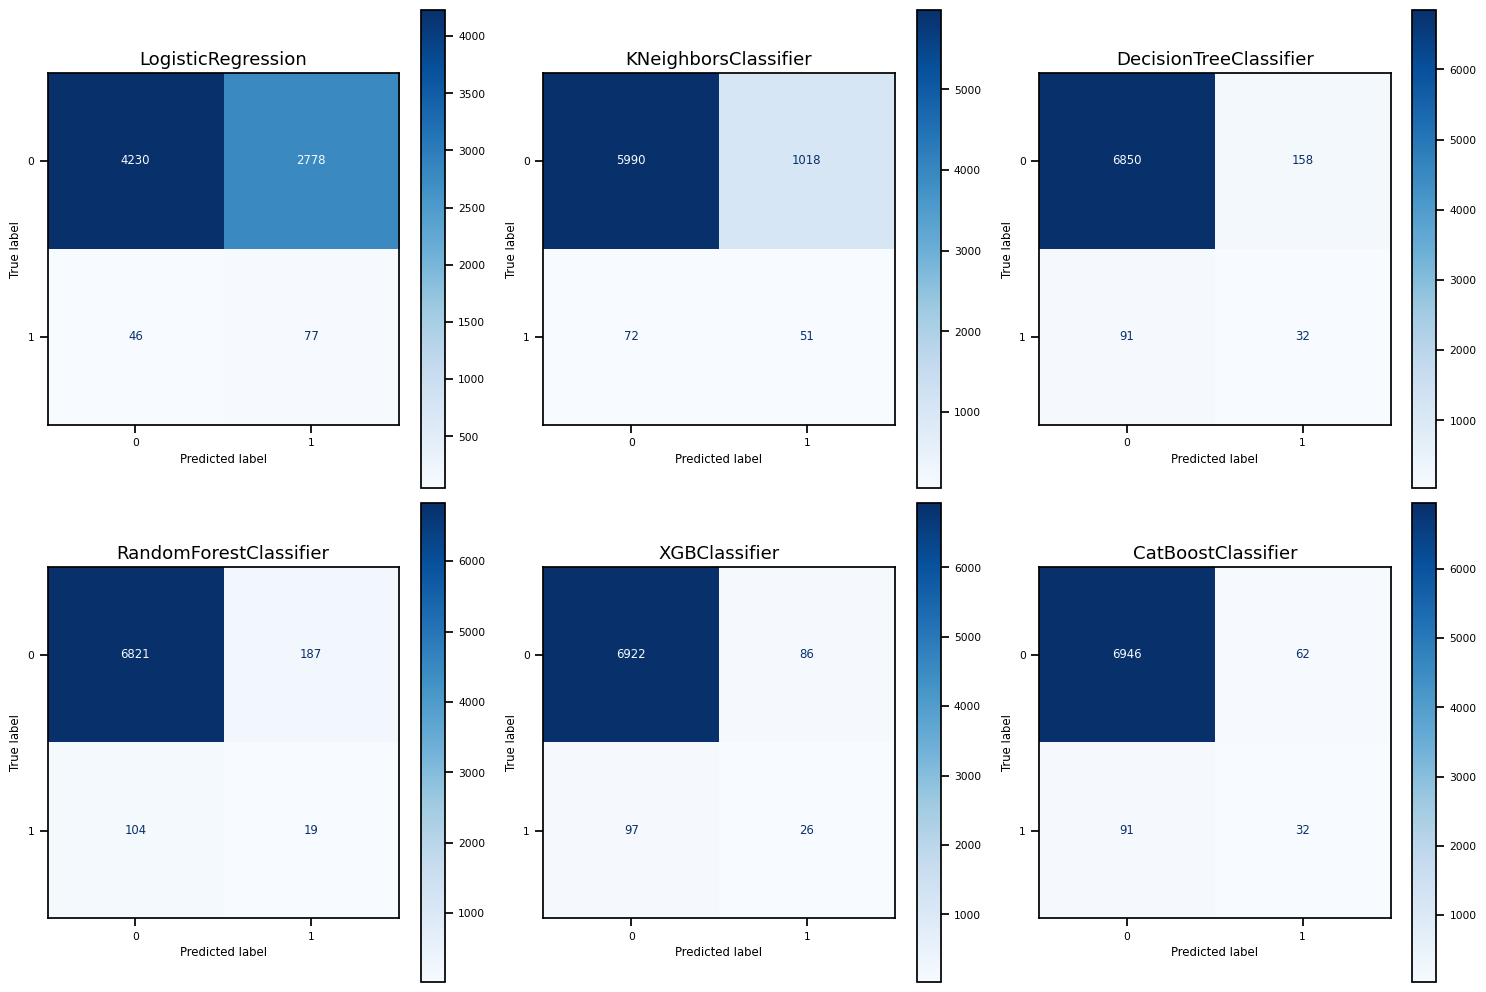

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(list(classifiers.values()), axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test[selected_features], 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

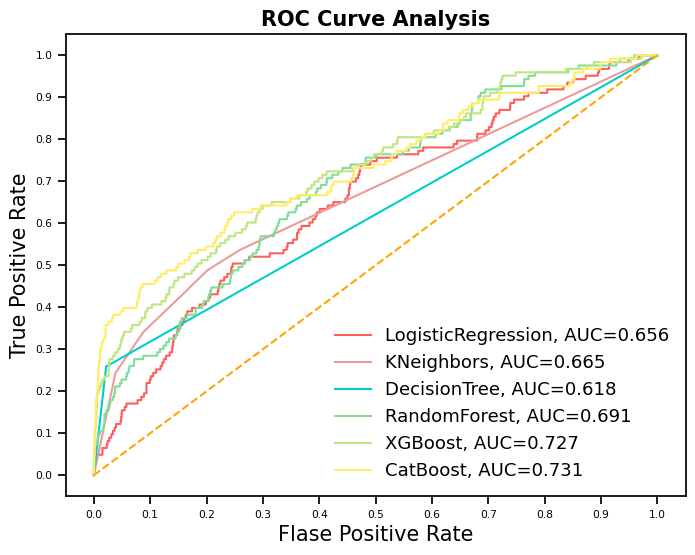

In [47]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [48]:
result_table.iloc[:,:4]

,accuracy,presicion,recall,f1_score
classifiers,,,,
LogisticRegression,0.603983,0.972644,0.603983,0.737694
KNeighbors,0.847146,0.971902,0.847146,0.902269
DecisionTree,0.965082,0.972772,0.965082,0.968735
RandomForest,0.959192,0.969583,0.959192,0.964218
XGBoost,0.974337,0.973174,0.974337,0.973747
CatBoost,0.978544,0.975915,0.978544,0.977133
